# <font color=darkred>Laboratory 14: "Reject it or Fail!" or a Lab on "Hypothesis Testing" </font>

In [100]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

#### Remember where we left our last laboratory session (Lab13)? 

![](https://media.tumblr.com/tumblr_mbui1kpPoU1rxdw8g.gif)


#### Accept my gratitude if you do! But in case you saw Agent K and Agent J sometime after Thurssday or for any other reason, do not recall it, here is where were we left things:
#### We had a csv file (lab13_data.csv) dataset with two sets of numbers (Set 1 and Set2). We did a bunch of stuff and decided that the Normal Distribution Data Model provides a good fit for both of sample sets. We, then used the right parameters for Normal Data Model (mean and standard deviation) to generate one new sample set based on each set. We then looked at the four sets next to each other and asked a rather simple question: Are these sets different or similar?
#### While we reached some assertions based on visual assessment, we did not manage to solidify our assertation in any numerical way. Well, now is the time! 

In [1]:
#Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Previously ...
data = pd.read_csv("lab13_data.csv") 
set1 = np.array(data['Set1'])
set2 = np.array(data['Set2'])
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)
data2 = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})


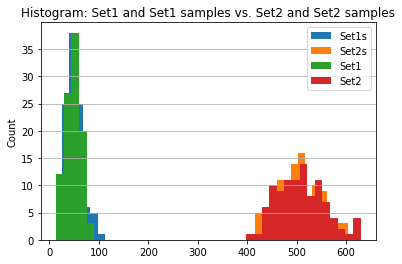

In [3]:
#Previously ...
fig, ax = plt.subplots()
data2.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

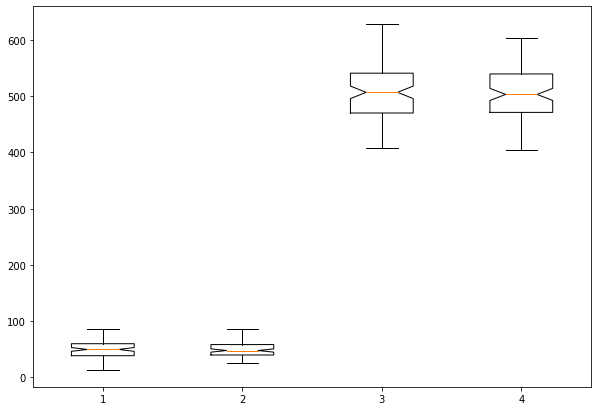

In [4]:
#Previously ...
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

__We can use statistical hypothesis tests to confirm that our sets are from Normal Distribution Data Models. We can use the Shapiro-Wilk Normality Test:__

In [5]:
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro

stat, p = shapiro(data['Set1'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.992, p=0.793
Probably Gaussian


In [6]:
# the Shapiro-Wilk Normality Test for set2
from scipy.stats import shapiro

stat, p = shapiro(data['Set2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.981, p=0.151
Probably Gaussian


__Now let's confirm that set1 and set1_s are from the same distribution. We can use the Mann-Whitney U Test for this:__

In [10]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data2['Set1s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4902.000, p-value at rejection =0.406
Probably the same distribution


__Let's also confirm that set2 and set2_s are from the same distribution:__

In [11]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set2'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4811.000, p-value at rejection =0.323
Probably the same distribution


__Based on the results we can say set1 and set1_s probably belong to the same distrubtion. The same can be stated about set2 and set2_s. Now let's check and see if set1 and set2 are SIGNIFICANTLY different or not?__

In [12]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data['Set2'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__The test's result indicate that the set1 and set2 belong to distirbutions with different measures of central tendency (means). We can check the same for set1_s and set2_s as well:__

In [13]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data2['Set1s'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__Now we can state at a 95% confidence level that set1 and set2 are different. The same for set1s and set2s.__

___
### Example: A dataset containing marks obtained by students on basic skills like basic math and language skills (reading and writing) is collected from an educational institution and we have been tasked to give them some important inferences. 

> Hypothesis: There is no difference in means of student performance in any of basic literacy skills i.e. reading, writing, math.

___
*This is based on an example by Joju John Varghese on "Hypothesis Testing for Inference using a Dataset" available @ https://medium.com/swlh/hypothesis-testing-for-inference-using-a-data-set-aaa799e94cdf. The dataset is available @ https://www.kaggle.com/spscientist/students-performance-in-exams.*

In [15]:
df = pd.read_csv("StudentsPerformance.csv") 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
set1 = df['math score']
set2 = df['reading score']
set3 = df['writing score']

Text(0.5, 0, 'Test Results')

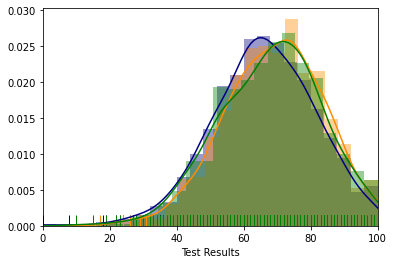

In [28]:
import seaborn as sns
sns.distplot(set1,color='navy', rug=True)
sns.distplot(set2,color='darkorange', rug=True)
sns.distplot(set3,color='green', rug=True)
plt.xlim(0,100)
plt.xlabel('Test Results')


####  It seems that all three samples have the same population means and it seems there is no significant difference between them at all. Let's set the null and alternative hypothesis:

> Ho: There is no difference in performance of students between math, reading and writing skills. <br>
Ha: There is a difference in performance of students between math, reading and writing skills. <br>

In [30]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set2)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=441452.500, p-value at rejection =0.000
Probably different distributions


In [31]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=461212.500, p-value at rejection =0.001
Probably different distributions


In [32]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set2,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=480672.000, p-value at rejection =0.067
Probably the same distribution


In [37]:
from scipy.stats import kruskal
stat, p = kruskal(set1, set2, set3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=21.225, p=0.000
Probably different distributions


___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>


*Here are some great reads on this topic:* 
- __"Hypothesis testing in Machine learning using Python"__ by __Yogesh Agrawal__ available at *https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce* <br>
- __"Quick Guide To Perform Hypothesis Testing"__ available at *https://www.analyticsvidhya.com/blog/2020/12/quick-guide-to-perform-hypothesis-testing/*<br>
- __"A Gentle Introduction to Statistical Hypothesis Testing"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests/*<br>
- __"17 Statistical Hypothesis Tests in Python (Cheat Sheet)"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/*<br>

*Here are some great videos on these topics:* 
- __"Statistical Hypothesis Testing- Data Science with Python"__ by __Technology for Noobs__ available at *https://www.youtube.com/watch?v=kd6zKBa9Rfk* <br>
- __"Hypothesis Testing, p-value & Confidence Intervals, Exploratory Data Analysis In Python Statistics"__ by __TheEngineeringWorld__ available at *https://www.youtube.com/watch?v=kz1IXqcFVCo* <br>
- __"Python Tutorial : Hypothesis tests"__ by __DataCamp__ available at *https://www.youtube.com/watch?v=6wbldEMpRXc* <br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: Wait a minute ... Isn't The Kruskal-Wallis test missing something?  <br>

### In the last example we used the Kruskal-Wallis to check whether the three sets belong to the same distribution or at least one of them is different. The question is, how can we find the sets that are different? What is the missing piece in tests such as The Kruskal-Wallis Test?  

#### _Make sure to cite any resources that you may use._ 

![](http://img.picturequotes.com/2/124/123499/one-finds-the-truth-by-making-a-hypothesis-and-comparing-observations-with-the-hypothesis-quote-1.jpg)